# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x_old = x0
    niter = 0
    for i in range(maxiter):
        x_new = x_old - f(x_old)/fder(x_old)
        niter += 1
        d = abs(x_old - x_new)
        if (d < eps):
            break
        x_old = x_new
    return x_new, niter

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

Парабола выпуклая, поэтому если $x_0$ выбрано так, что $f(x_0) \geq 0$ то метод ньютона ну никак не сможет пройти в отрицательную область, и наоборот. Так что тут должно быть все прекрасно, можно вообще не париться и написать самый примитивный алгоритм

In [25]:
newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, 2)

(1.000000000000001, 5)

In [26]:
newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, -3)

(-1.0, 6)

Наблюдаем, как алгоритму плохеет...

In [27]:
newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, 0.1)

(1.0000000000139897, 7)

In [28]:
newton_iteration(lambda x: x**2 - 1, lambda x: 2*x, 1e-5)

(1.0, 21)

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [29]:
def upd_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):
    x_old = x0
    niter = 0
    for i in range(maxiter):
        x_new = x_old - m*f(x_old)/fder(x_old)
        niter += 1
        d = abs(x_old - x_new)
        if (d < eps):
            break
        x_old = x_new
    return x_new, niter

In [34]:
for i in range(5):
    print(upd_newton_iteration(lambda x: (x**2 - 1)**2, lambda x: 4*(x**3 - x), 2, 1+i))

(1.0000078296573287, 18)
(1.0000000000000009, 5)
(0.9999978588127855, 17)
(0.5, 1003)
(-0.7767873152786016, 1003)


Действительно, так оно и есть.  
При $m = 5$ он видимо просто перескочил корень  
При $m = 4$ он просто скачет с 0.5 на 2 и обратно постоянно

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

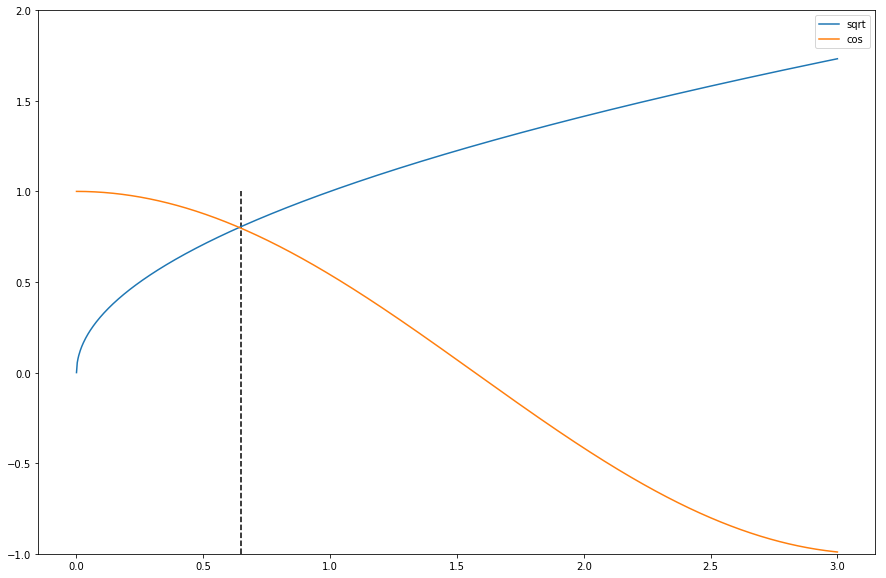

In [60]:
x = np.linspace(0, 3, 1000)
sq = np.sqrt(x)
cs = np.cos(x)

fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(x, sq, label = 'sqrt')
ax.plot(x, cs, label = 'cos')
ax.set_ylim((-1, 2))
ax.legend()
ax.vlines(0.65, -1, 1, linestyles = 'dashed')
plt.show()

In [61]:
def fix(f, x0, alpha = 1, eps=1e-5, maxiter=1000):
    n = 0
    x_old = x0
    for i in range(maxiter):
        n += 1
        x = x_old - alpha*f(x_old)
        if (abs(x_old - x)) < eps:
            break
        x_old = x
    return(x, n)

In [62]:
def f(x):
    return np.sqrt(x) - np.cos(x)

In [84]:
fix(f, 0.65, eps = 1e-10)
# теперь проверим как быстро мы сходимся от альфы

(0.6417143708790404, 14)

In [90]:
a = np.arange(-19.95, 20, 0.1) #пределы кривые, чтоб в ноль не попасть
for i in a:
    print('alpha = ',round(i, 4) ,'steps = ', fix(f, 0.65, alpha = i)[1])

alpha =  -19.95 steps =  1000
alpha =  -19.85 steps =  1000
alpha =  -19.75 steps =  1000
alpha =  -19.65 steps =  1000
alpha =  -19.55 steps =  1000
alpha =  -19.45 steps =  1000
alpha =  -19.35 steps =  1000
alpha =  -19.25 steps =  1000
alpha =  -19.15 steps =  1000
alpha =  -19.05 steps =  1000
alpha =  -18.95 steps =  1000
alpha =  -18.85 steps =  1000
alpha =  -18.75 steps =  1000
alpha =  -18.65 steps =  1000
alpha =  -18.55 steps =  1000
alpha =  -18.45 steps =  1000
alpha =  -18.35 steps =  1000
alpha =  -18.25 steps =  1000
alpha =  -18.15 steps =  1000
alpha =  -18.05 steps =  1000
alpha =  -17.95 steps =  1000
alpha =  -17.85 steps =  1000
alpha =  -17.75 steps =  1000
alpha =  -17.65 steps =  1000
alpha =  -17.55 steps =  1000
alpha =  -17.45 steps =  1000
alpha =  -17.35 steps =  1000
alpha =  -17.25 steps =  1000
alpha =  -17.15 steps =  1000
alpha =  -17.05 steps =  1000
alpha =  -16.95 steps =  1000
alpha =  -16.85 steps =  1000
alpha =  -16.75 steps =  1000
alpha =  -

/home/pavel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


 3.15 steps =  1000
alpha =  3.25 steps =  1000
alpha =  3.35 steps =  1000
alpha =  3.45 steps =  1000
alpha =  3.55 steps =  1000
alpha =  3.65 steps =  1000
alpha =  3.75 steps =  1000
alpha =  3.85 steps =  1000
alpha =  3.95 steps =  1000
alpha =  4.05 steps =  1000
alpha =  4.15 steps =  1000
alpha =  4.25 steps =  1000
alpha =  4.35 steps =  1000
alpha =  4.45 steps =  1000
alpha =  4.55 steps =  1000
alpha =  4.65 steps =  1000
alpha =  4.75 steps =  1000
alpha =  4.85 steps =  1000
alpha =  4.95 steps =  1000
alpha =  5.05 steps =  1000
alpha =  5.15 steps =  1000
alpha =  5.25 steps =  1000
alpha =  5.35 steps =  1000
alpha =  5.45 steps =  1000
alpha =  5.55 steps =  1000
alpha =  5.65 steps =  1000
alpha =  5.75 steps =  1000
alpha =  5.85 steps =  1000
alpha =  5.95 steps =  1000
alpha =  6.05 steps =  1000
alpha =  6.15 steps =  1000
alpha =  6.25 steps =  1000
alpha =  6.35 steps =  1000
alpha =  6.45 steps =  1000
alpha =  6.55 steps =  1000
alpha =  6.65 steps =  1000


При орицательных не сходится вообще, ну оно и логично, производная то у функции положительна. При больших тоже, потму что наша константа липшица вылетае за 1 и принцип сжимающих отображений не работает. Минимум был на 0.75 - 0.85  
У нас есть графическое приближение корня где-то в райное 0.65. Тогда производная функции $\approx \dfrac{1}{2\sqrt{0.65}} + sin(0.65) \approx  1.23$ То есть по идее оптимум должен быть при альфа где-то 0.8 Ну мы так и видим.  
Ну давайте ближе смотреть на окрестность от 0.7 до 1, заодно уменьшим эпсилон, чтобы разрешение получше было.

In [93]:
def dder(x):
    return 1/(2*np.sqrt(x)) + np.sin(x)
print(dder(0.65))
print(1/dder(0.65))
print(2/(dder(0.7)+dder(0.6)), ' это посчитано по формуле лектора, но моя оценка ничуть не хуже')

1.2253600786820817
0.816086648649053
0.8156701027290181  это посчитано по формуле лектора, но моя оценка ничуть не хуже


In [92]:
k = np.arange(0.7, 1, 0.01)
for i in k:
    print('alpha = ',round(i, 4) ,'steps = ', fix(f, 0.65, alpha = i, eps = 1e-10)[1])

alpha =  0.7 steps =  11
alpha =  0.71 steps =  10
alpha =  0.72 steps =  10
alpha =  0.73 steps =  10
alpha =  0.74 steps =  9
alpha =  0.75 steps =  9
alpha =  0.76 steps =  8
alpha =  0.77 steps =  8
alpha =  0.78 steps =  7
alpha =  0.79 steps =  7
alpha =  0.8 steps =  6
alpha =  0.81 steps =  5
alpha =  0.82 steps =  5
alpha =  0.83 steps =  6
alpha =  0.84 steps =  7
alpha =  0.85 steps =  7
alpha =  0.86 steps =  8
alpha =  0.87 steps =  8
alpha =  0.88 steps =  9
alpha =  0.89 steps =  9
alpha =  0.9 steps =  9
alpha =  0.91 steps =  10
alpha =  0.92 steps =  10
alpha =  0.93 steps =  11
alpha =  0.94 steps =  11
alpha =  0.95 steps =  12
alpha =  0.96 steps =  12
alpha =  0.97 steps =  12
alpha =  0.98 steps =  13
alpha =  0.99 steps =  13
alpha =  1.0 steps =  14


Оптимум для альфы как раз на 0.81-0.82, как теория и предсказывала. Функан сила

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [191]:
# готовим массим точек
a = np.linspace(-2, 2, 1000)
A = [(x, y) for x in a for y in a]

In [192]:
def sol(x0, alpha = 0.1,  eps = 1e-7, maxiter = 1000):
    x_old = x0
    for i in range(maxiter):
        x = x_old - (x_old**3 - 1)/(3*x_old**2)
        if (abs(x_old - x)) < eps:
            break
        x_old = x
    return x 

In [193]:
sol(-2-2j) # оно сходится

(-0.49999999999999933-0.866025403784439j)

In [194]:
red = []
blue = []
green = []
for i in A:
    point = sol(i[0] + i[1]*1j)
    if abs(1 - point) < 1e-3:
        red.append(i)
    elif abs(-0.5 + 0.8660254037844386j - point )<1e-3:
        blue.append(i)
    elif abs(-0.5 - 0.8660254037844386j - point )<1e-3:
        green.append(i)
        
red = np.array(red)
blue = np.array(blue)
green = np.array(green)

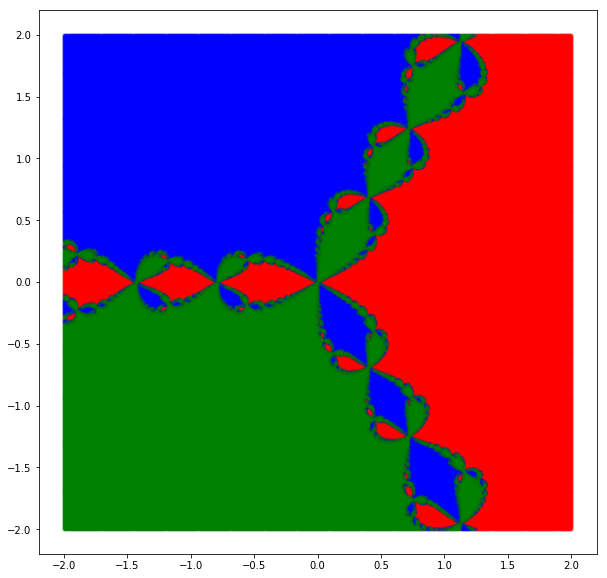

In [212]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(red[:,0], red[:, 1], '.', c = 'r', alpha = 0.1)
ax.plot(blue[:,0], blue[:, 1],'.', c = 'b', alpha = 0.1)
ax.plot(green[:,0], green[:, 1], '.',  c = 'g', alpha = 0.1)
plt.show()